#Preparação dos dados

Primeiro foi feita uma modificação da base de dados (disponivel em: https://github.com/rissgrouphub/ransomwaredataset2016) para acresentar o cabeçalhos, numerodos de 1 até 30970.  

In [1]:
import io
import pandas as pd
df = pd.read_csv('RansomwareData2.csv')

In [3]:
print(df)

          1  2  3  4  5  6  7  8  9  10  ...  30961  30962  30963  30964  \
0     10001  1  2  0  0  0  0  0  0   0  ...      0      0      0      0   
1     10002  1  3  1  0  1  0  1  0   1  ...      0      0      0      0   
2     10003  1  2  0  0  0  0  0  0   0  ...      0      0      0      0   
3     10005  1  5  0  0  0  0  1  0   0  ...      0      0      0      0   
4     10006  1  7  1  0  1  0  0  1   1  ...      0      0      0      0   
...     ... .. .. .. .. .. .. .. ..  ..  ...    ...    ...    ...    ...   
1519  21254  0  0  0  0  0  0  1  0   0  ...      0      0      0      0   
1520  21255  0  0  0  0  1  0  1  0   1  ...      0      0      0      0   
1521  21256  0  0  0  0  1  0  1  0   1  ...      0      0      0      0   
1522  21258  0  0  0  0  1  0  0  0   0  ...      0      0      0      0   
1523  21259  0  0  0  0  1  0  1  0   0  ...      0      0      0      0   

      30965  30966  30967  30968  30969  30970  
0         0      0      0      0      

Foi feita uma copia do dataframe para o dataframe2 para que o dataframe original não sofra modificações. No dataframe2 foram retirados as colunas 1 e 3 que tinham o id e o numero que correspodem ao tipo de familia respectivamente.

In [4]:
df2 = df.copy()
del df2['1']
del df2['3']
print(df2.isnull().values.any())
print(df2)

False
      2  4  5  6  7  8  9  10  11  12  ...  30961  30962  30963  30964  30965  \
0     1  0  0  0  0  0  0   0   0   0  ...      0      0      0      0      0   
1     1  1  0  1  0  1  0   1   0   0  ...      0      0      0      0      0   
2     1  0  0  0  0  0  0   0   0   0  ...      0      0      0      0      0   
3     1  0  0  0  0  1  0   0   0   0  ...      0      0      0      0      0   
4     1  1  0  1  0  0  1   1   0   1  ...      0      0      0      0      0   
...  .. .. .. .. .. .. ..  ..  ..  ..  ...    ...    ...    ...    ...    ...   
1519  0  0  0  0  0  1  0   0   0   0  ...      0      0      0      0      0   
1520  0  0  0  1  0  1  0   1   0   0  ...      0      0      0      0      0   
1521  0  0  0  1  0  1  0   1   1   1  ...      0      0      0      0      0   
1522  0  0  0  1  0  0  0   0   0   1  ...      0      0      0      0      0   
1523  0  0  0  1  0  1  0   0   0   0  ...      0      0      0      0      0   

      30966  30967  3

#PCA

In [5]:
maior = -1.0
nome = 'nada'

Foi feito a separação dos dados entre conjuntos de teste e treino e o a culuna 2 foi escolhida como alvo, pois nela se contem se um software é goodware ou Ransomware

In [7]:
df3 = df2.copy()
y=df3['2']
X=df3.drop('2',axis=1)

In [8]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.191654   0.06432007 0.05221266 0.03011459 0.02653366 0.02371954
 0.01974637 0.01763584 0.01751266 0.01576473 0.01456227 0.01371308
 0.01244487 0.01199051 0.01150513 0.0108103  0.01028479 0.01001037
 0.0094605  0.00937299 0.00907914 0.00861209 0.00811953 0.00738356
 0.00722721 0.00675339 0.00633983 0.0059363  0.00570493 0.00558958
 0.00510348 0.00499997 0.00478373 0.00472799 0.00454904 0.00449857
 0.00439247 0.00417596 0.00404001 0.00395853 0.00390477 0.00385649
 0.00382155 0.00363963 0.00351269 0.00341728 0.00336168 0.00325433
 0.00318664 0.0030039  0.00298625 0.00285966 0.0027529  0.00271945
 0.00260184 0.00256766 0.00249316 0.0024404  0.00238344 0.0023171
 0.00230058 0.00226172 0.00219579 0.00219152 0.00212936 0.00211272
 0.00204594 0.00202933 0.00198717 0.0019695  0.00193096 0.00191382
 0.00187125 0.00185922 0.00181549 0.00180634 0.00176891 0.00176614
 0.00175109 0.00172318 0.00168909 0.00166678 0.00163237 0.00161792
 0.00158687 0.00157033 0.00154796 0.00150026 0.00148699 0.00147

##Regressão logistica com PCA

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)

print(logisticRegr.score(X_test, y_test))

0.9836065573770492


In [13]:
if(logisticRegr.score(X_test, y_test)==maior):
  nome = nome + ' e regressão logistica'
elif(logisticRegr.score(X_test, y_test)>maior):
  maior = logisticRegr.score(X_test, y_test)
  nome = 'Regressao logistica'

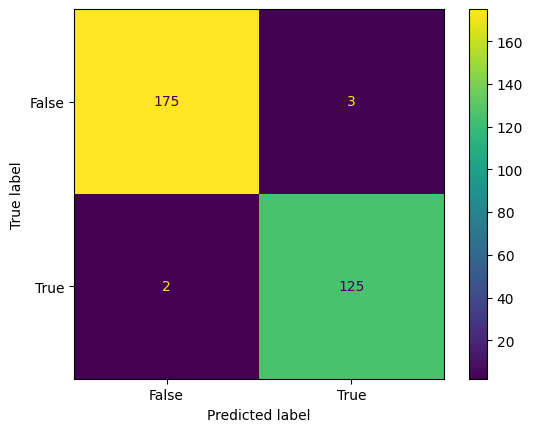

In [14]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoLogistica = logisticRegr.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoLogistica)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##KNN com PCA


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9180327868852459

In [16]:
if(knn.score(X_test, y_test)==maior):
  nome = nome + ' e KNN'
elif(knn.score(X_test, y_test)>maior):
  maior = knn.score(X_test, y_test)
  nome = 'KNN'

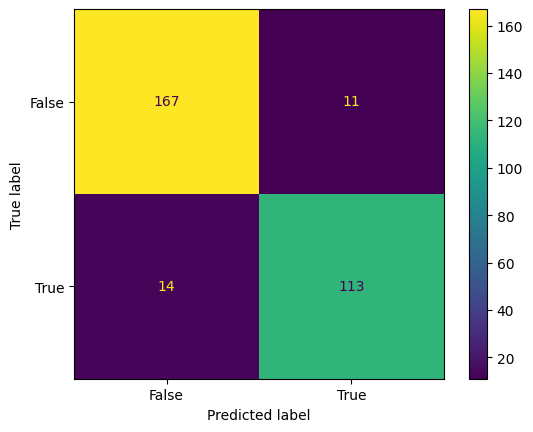

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoknn = knn.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoknn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##Gaussian Naive Bayes com PCA

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.5442622950819672

In [19]:
if(gnb.score(X_test, y_test)==maior):
  nome = nome + ' e Gaussian Naive Bayes'
elif(gnb.score(X_test, y_test)>maior):
  maior = gnb.score(X_test, y_test)
  nome = 'Gaussian Naive Bayes'

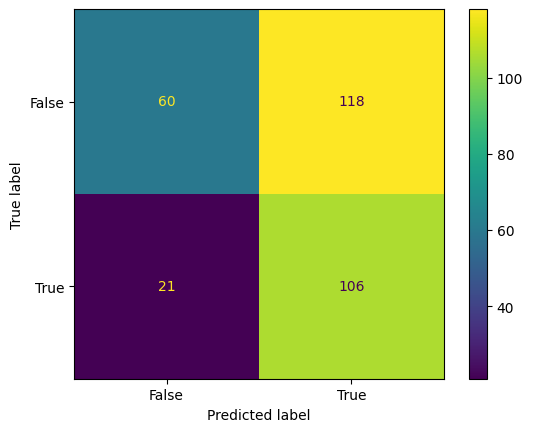

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoGNB = gnb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoGNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##SVM com PCA

In [21]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.940983606557377

In [22]:
if(clf.score(X_test, y_test)==maior):
  nome = nome + ' e SVM'
elif(clf.score(X_test, y_test)>maior):
  maior = clf.score(X_test, y_test)
  nome = 'SVM'

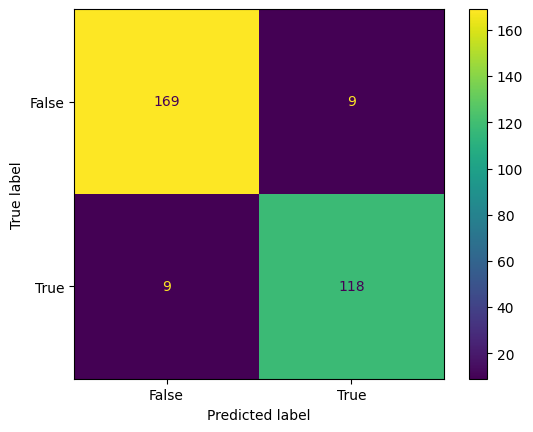

In [23]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoSVM = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoSVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##SGD com PCA

In [27]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=10)
sgd.fit(X_train,y_train)
sgd.score(X_test, y_test)

0.980327868852459

In [28]:
if(sgd.score(X_test, y_test)==maior):
  nome = nome + ' e SGD'
elif(sgd.score(X_test, y_test)>maior):
  maior = sgd.score(X_test, y_test)
  nome = 'SGD'

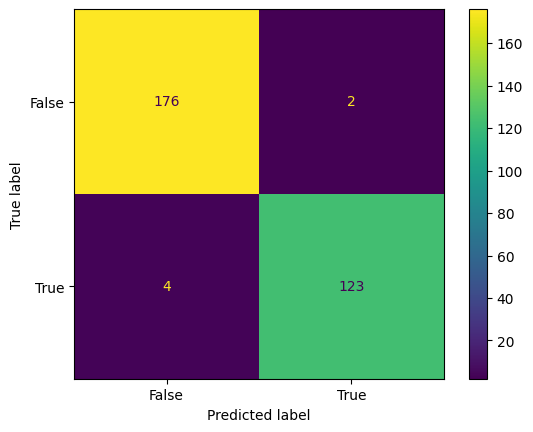

In [29]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoSGD = sgd.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoSGD)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##Redes Neurais com PCA

In [30]:
from sklearn.neural_network import MLPClassifier

RN = MLPClassifier(random_state=1,max_iter=10000)
RN.fit(X_train, y_train)
RN.score(X_test, y_test)

0.980327868852459

In [31]:
if(RN.score(X_test, y_test)==maior):
  nome = nome + ' e Redes Neurais'
elif(RN.score(X_test, y_test)>maior):
  maior = RN.score(X_test, y_test)
  nome = 'Redes Neurais'

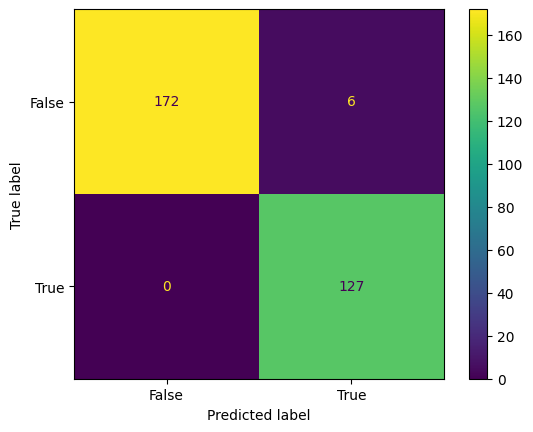

In [32]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoRN = RN.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoRN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
print(maior)
print(nome)

0.9836065573770492
Regressao logistica


##Grid


In [35]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [36]:
modelo = LogisticRegression()

In [37]:
print(modelo.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [50]:
valores_grid = {'penalty':(None,'l2','l1','elasticnet'),'dual':(False,True),'fit_intercept':(True,False), 'class_weight':(None,'balanced'), 'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'), 'multi_class':('auto', 'ovr', 'multinomial'),'max_iter': [10000], 'warm_start':(False,True)}
seed = 7

In [51]:
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, y)
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\telma 

c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  category=UserWarning,


Melhores Parâmetros do Modelo:
 LogisticRegression(max_iter=10000, solver='sag', warm_start=True)


In [52]:
from sklearn.linear_model import LogisticRegression
logisticRegr2 = LogisticRegression(max_iter=10000, solver='sag', warm_start=True)
logisticRegr2.fit(X_train, y_train)
logisticRegr2.score(X_test, y_test)
print(logisticRegr2.score(X_test, y_test))

0.9836065573770492


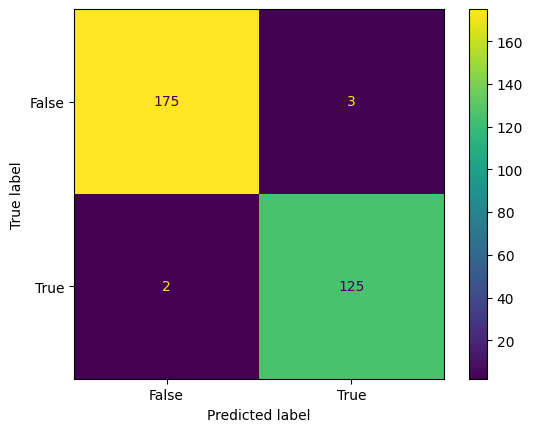

In [53]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoLogistica = logisticRegr2.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoLogistica)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#Analise com Random Forest

In [39]:
maior = -1.0
nome = 'nada'

In [40]:
df4 = df2.copy()
y=df4['2']
X=df4.drop('2',axis=1)

In [41]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(random_state=0))
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2351

In [43]:
df5 = pd.DataFrame()

for i in range(len(selected_feat)):
  df5[selected_feat[i]] = X[selected_feat[i]]
print(df5)

c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


      4  5  6  7  8  9  10  11  12  14  ...  30821  30830  30859  30876  \
0     0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
1     1  0  1  0  1  0   1   0   0   0  ...      0      0      0      0   
2     0  0  0  0  0  0   0   0   0   0  ...      0      0      0      0   
3     0  0  0  0  1  0   0   0   0   0  ...      0      0      0      0   
4     1  0  1  0  0  1   1   0   1   0  ...      0      0      0      0   
...  .. .. .. .. .. ..  ..  ..  ..  ..  ...    ...    ...    ...    ...   
1519  0  0  0  0  1  0   0   0   0   0  ...      0      0      0      0   
1520  0  0  1  0  1  0   1   0   0   0  ...      0      0      0      0   
1521  0  0  1  0  1  0   1   1   1   0  ...      0      0      0      0   
1522  0  0  1  0  0  0   0   0   1   1  ...      0      0      0      0   
1523  0  0  1  0  1  0   0   0   0   0  ...      0      0      0      0   

      30921  30924  30939  30942  30955  30970  
0         0      0      0      0      0      0  
1

In [45]:
from sklearn.model_selection import train_test_split
y=df4['2']
X=df5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Regressão logistica com Random Forest



In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)

0.9770491803278688

In [ ]:
if(logisticRegr.score(X_test, y_test)==maior):
  nome = nome + ' e Regressão Logistica'
elif(logisticRegr.score(X_test, y_test)>maior):
  maior = logisticRegr.score(X_test, y_test)
  nome = 'Regressão Logistica'

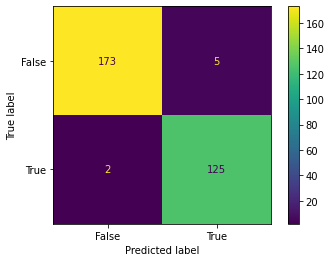

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoLogistica = logisticRegr.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoLogistica)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##KNN com Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
knn = KNeighborsClassifier(n_neighbors= int(sqrt(len(selected_feat))))
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8622950819672132

In [ ]:
if(knn.score(X_test, y_test)==maior):
  nome = nome + ' e KNN'
elif(knn.score(X_test, y_test)>maior):
  maior = knn.score(X_test, y_test)
  nome = 'KNN'

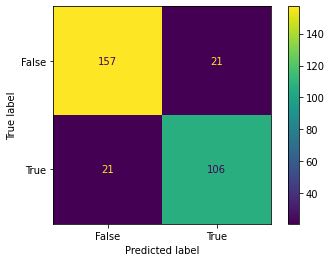

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoknn = knn.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoknn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##Gaussian Naive Bayes com Random Forest

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.6786885245901639

In [ ]:
if(gnb.score(X_test, y_test)==maior):
  nome = nome + ' e Guassian Naive Bayes'
elif(gnb.score(X_test, y_test)>maior):
  maior = gnb.score(X_test, y_test)
  nome = 'Gaussian Naive Bayes'

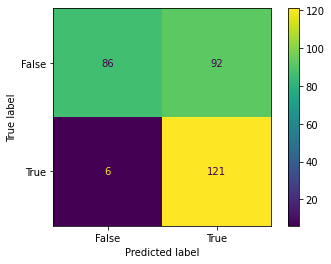

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoGNB = gnb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoGNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##SVM com Random Forest

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9606557377049181

In [ ]:
if(clf.score(X_test, y_test)==maior):
  nome = nome + ' e SVM'
elif(clf.score(X_test, y_test)>maior):
  maior = clf.score(X_test, y_test)
  nome = 'SVM'

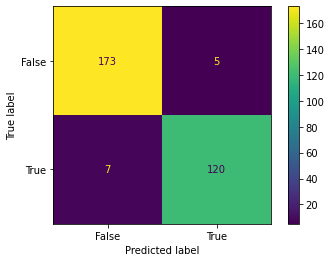

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoSVM = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoSVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##SGD com Random Forest

In [46]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=0)
sgd.fit(X_train,y_train)
sgd.score(X_test, y_test)

0.9868852459016394

In [ ]:
if(sgd.score(X_test, y_test)==maior):
  nome = nome + ' e SGD'
elif(sgd.score(X_test, y_test)>maior):
  maior = sgd.score(X_test, y_test)
  nome = 'SGD'

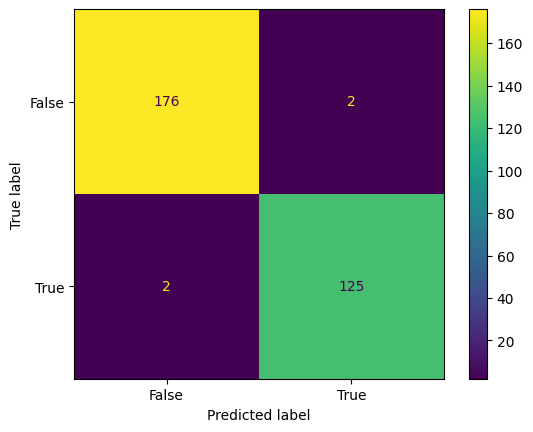

In [47]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoSGD = sgd.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoSGD)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##Redes Neurais com Random Forest

In [ ]:
from sklearn.neural_network import MLPClassifier

RN = MLPClassifier(random_state=1,max_iter=10000)
RN.fit(X_train, y_train)
RN.score(X_test, y_test)

0.9704918032786886

In [ ]:
if(RN.score(X_test, y_test)==maior):
  nome = nome + ' e Redes Neurais'
elif(RN.score(X_test, y_test)>maior):
  maior = RN.score(X_test, y_test)
  nome = 'Redes Neurais'

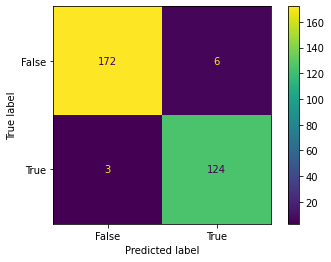

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoRN = RN.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoRN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(maior)
print(nome)

0.9868852459016394
SGD


##SDG Grid

In [48]:
valores_grid = {'loss':('hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),'penalty':('l2', 'l1', 'elasticnet', None),'random_state':np.array(list(range(0,21)))}
seed = 7

In [49]:
modelo = SGDClassifier()

In [50]:
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, y)
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\telma machado\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "c:\users\telma machado\appdata\local\pr

Melhores Parâmetros do Modelo:
 SGDClassifier(loss='squared_hinge', penalty='l1', random_state=10)


In [53]:
from sklearn.linear_model import SGDClassifier

sgd2 = SGDClassifier(loss='squared_hinge', penalty='l1', random_state=10)
sgd2.fit(X_train,y_train)
sgd2.score(X_test, y_test)

0.9868852459016394

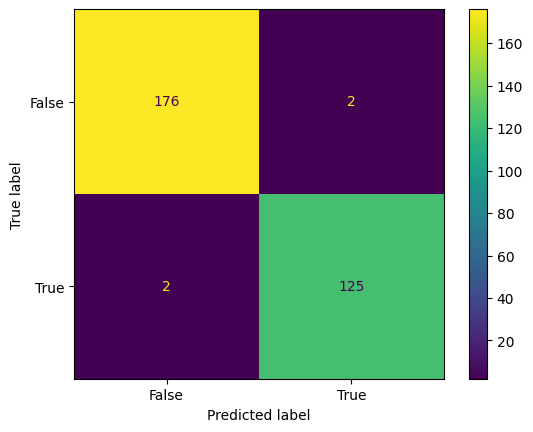

In [54]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicaoSGD = sgd2.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,predicaoSGD)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()